In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic_updated.csv')

In [4]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [5]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with no of people')

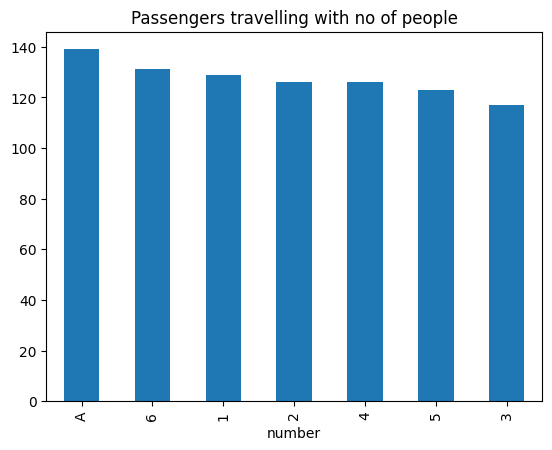

In [10]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with no of people')


In [12]:
#extract numerical part from the number column
df['number_numerical'] = pd.to_numeric(df['number'],errors = 'coerce',downcast = 'integer')

In [15]:
#extract categorical part from the number column
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [16]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [18]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
df['Cabin_num'] = df['Cabin'].str.extract('(\d+)')
df['Cabin_cat'] = df['Cabin'].str[0]
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,Cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='Cabin_cat'>

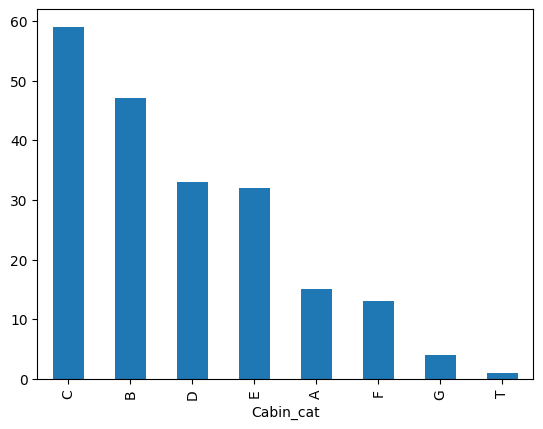

In [35]:
df['Cabin_cat'].value_counts().plot(kind = 'bar')

In [36]:
df['Ticket_numeric'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['Ticket_numeric'] = pd.to_numeric(df['Ticket_numeric'], errors = 'coerce', downcast = 'integer')

In [43]:
# here first in ticket_cat i had split the string of ticket and took the first part of it before space and then applied np.where function on ticket_cat 
# by putting condition whether the ticket_cat element is digit or not if it is then by putting it as NAn and if not then then putting the ticket_cat data in the given column
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [41]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,Cabin_cat,Ticket_numeric,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536.0,NaN
887,B42,112053,3,1,3.0,NaN,42,B,112053.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607.0,W./C.
889,C148,111369,2,1,2.0,NaN,148,C,111369.0,NaN


<Axes: xlabel='ticket_cat'>

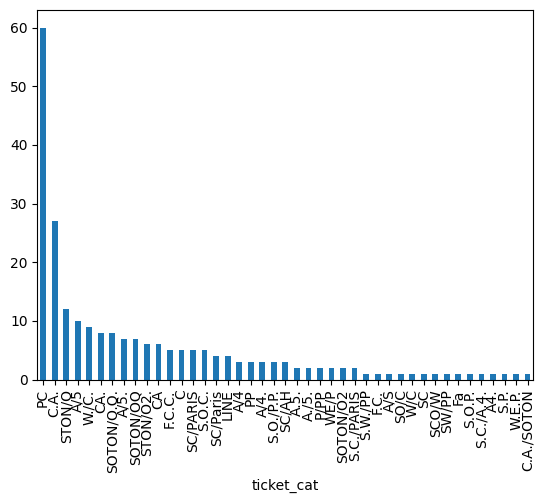

In [52]:
df['ticket_cat'].value_counts().plot(kind = 'bar')